# WZGW Projekt 2 - astronomia geodezyjna
Nr indeksu: 311512

### Mini sprawozdanie

Cel ćwiczenia: zaprezentowanie pozornego ruchu gwiazdy na niebie w czasie jednej doby z trzech różnych pozycji na Ziemi (Wybrałem Warszawę, Rio Grande (Chile) i Anchorage (Alaska)).

Dla wybranej gwiazdy (Syriusza) znając deklinację i rektascensję (dane wzięte z programu Stellarium) i zakładając datę 2021-12-12, przeliczyłem dane do układu horyzontalnego (wysokość gwiazdy w stopniach i azymut) dla 24 godzin, zaczynając 12 grudnia 2021 0:00 (UTC +0). Uzyskane dane przedstawiłem na wykresie - wykres zależności wysokości od czasu oraz wykres zależności azymutu od czasu. Stworzyłem prezentację wyników na sferze odniesienia w układzie horyzontalnym.

Pozorny ruch gwiazd na niebie był inny dla wszystkich trzech lokalizacji, jest to skutkiem różnych wysokości i długości geodezyjnych, na których znajdują się wymienione trzy miasta (poza tym, ruch pozorny gwiazd zależy od daty i godziny, ale to było w tym ćwiczeniu takie same dla wszystkich trzech lokacji). Analizując wykresy wysokości i azymutu w zależności od czasu, doszedłem do wniosku, że kulminacja nastąpiła najpierw w Warszawie, potem w Rio Grande, potem w Anchorage. Czyli ze wschodu na zachód, tak jak możnaby się spodziewać. Ponadto, Syriusz był o wiele dłużej widoczny na południu Chile niż na Alasce. Zgadza się to z ujemną wartością deklinacji gwiazdy. Zaobserwowałem, że kulminacje gwiazdy następują w azymucie 0 lub 180. Moment wschodu i zadchodu gwiazdy następuje, gdy współrzędna 'z' w układzie horyzontalnym jest równa 0.



In [32]:
import numpy as np
import pandas as pd
import datetime
from PyAstronomy import pyasl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
# import plotly.express as px
import plotly
from math import *
%matplotlib inline
plt.style.use('seaborn-poster')
# sns.set_theme()

# Zadanie

In [18]:
# jd = datetime.datetime(2021, 12, 1, 15)
# print(jd)
# jd = pyasl.jdcnv(jd)
# jd = pyasl.juldate(jd)
# print(jd)
# cjd = pyasl.get_juldate()
# cjd

In [19]:
# -- deklinacja w stopniach
# pyasl.degToDMS(16.74566666666667)
# pyasl.dmsToDeg(-16,44,44.4)
# pyasl.dmsToDeg(-16,44,44.5)
# pyasl.dmsToDeg(-16,44,44.6)

In [20]:
# -- rektascensja w stopniach
# pyasl.hmsToDeg(6, 46, 7.35)
# pyasl.hmsToDeg(6, 46, 7.36)

In [21]:
def pprintdms(wsp):
    """printuje/returnuje współrzędną w formacie stopnie, minuty, sekundy kątowe. Wejście to stopnie dziesiętne"""
    d = floor(wsp)
    m = floor((wsp-d)*60)
    s = round((wsp-d-m/60)*3600, 5)
#     print(f"{d}°{m}′{s}″")          # 
    s = '{:.5f}'.format(s)       #
    return f"{d}°{m}′{s}″"

In [22]:
orig_df = pd.read_csv('syriusz.csv', sep=';')

In [23]:
orig_df['Juliandate'] = pd.Series(map(
                                        lambda r,m,d,g: pyasl.jdcnv(datetime.datetime(r,m,d,g)),
                                        orig_df['Rok'],
                                        orig_df['Miesiąc'],
                                        orig_df['Dzień'],
                                        orig_df['Godzina'],
                                     )
                                 )

In [24]:
temp = pd.Series(map(lambda jd,ra,dec,fi,lam,al: pyasl.eq2hor(jd,ra,dec,lat=fi,lon=lam,alt=al,B1950=False,precess=False,nutate=False,aberration=False,refract=False),
                                orig_df['Juliandate'],
                                orig_df['Rektascensja'],
                                orig_df['Deklinacja'],
                                orig_df['fi_WW'],
                                orig_df['lam_WW'],
                                orig_df['alt_WW']
                                
                                )
                            )
orig_df['h_WW'] = pd.Series(map(lambda row: row[0][0], temp))
orig_df['az_WW'] = pd.Series(map(lambda row: row[1][0], temp))

temp = pd.Series(map(lambda jd,ra,dec,fi,lam,al: pyasl.eq2hor(jd,ra,dec,lat=fi,lon=lam,alt=al,B1950=False,precess=False,nutate=False,aberration=False,refract=False),
                                orig_df['Juliandate'],
                                orig_df['Rektascensja'],
                                orig_df['Deklinacja'],
                                orig_df['fi_RG'],
                                orig_df['lam_RG'],
                                orig_df['alt_RG']
                                
                                )
                            )
orig_df['h_RG'] = pd.Series(map(lambda row: row[0][0], temp))
orig_df['az_RG'] = pd.Series(map(lambda row: row[1][0], temp))

temp = pd.Series(map(lambda jd,ra,dec,fi,lam,al: pyasl.eq2hor(jd,ra,dec,lat=fi,lon=lam,alt=al,B1950=False,precess=False,nutate=False,aberration=False,refract=False),
                                orig_df['Juliandate'],
                                orig_df['Rektascensja'],
                                orig_df['Deklinacja'],
                                orig_df['fi_AN'],
                                orig_df['lam_AN'],
                                orig_df['alt_AN']
                                
                                )
                            )
orig_df['h_AN'] = pd.Series(map(lambda row: row[0][0], temp))
orig_df['az_AN'] = pd.Series(map(lambda row: row[1][0], temp))

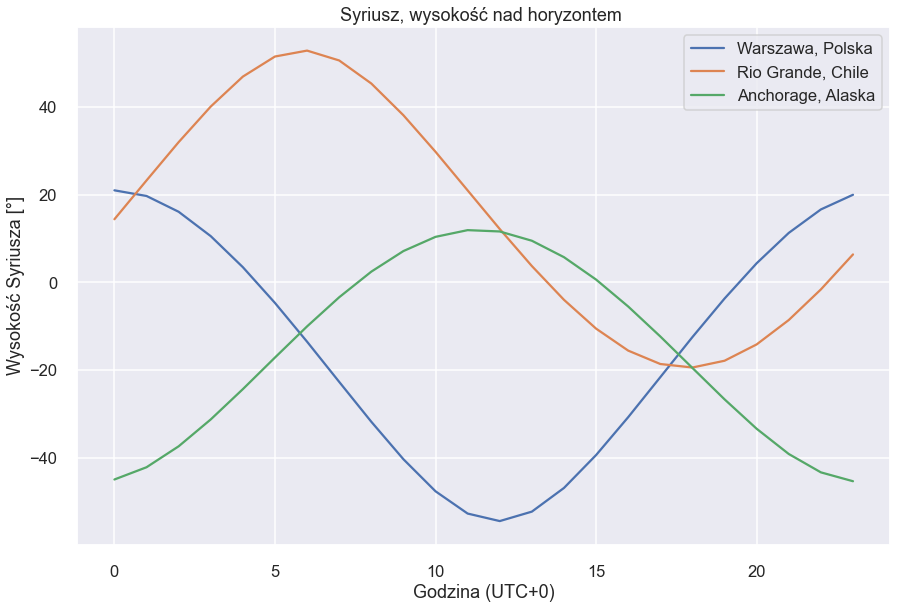

In [25]:
sns.set_theme(context='talk', style='darkgrid')

plt.plot(orig_df['Godzina'], orig_df['h_WW'], label="Warszawa, Polska")
plt.plot(orig_df['Godzina'], orig_df['h_RG'], label="Rio Grande, Chile")
plt.plot(orig_df['Godzina'], orig_df['h_AN'], label="Anchorage, Alaska")

plt.title('Syriusz, wysokość nad horyzontem ')
plt.xlabel('Godzina (UTC+0)')
plt.ylabel('Wysokość Syriusza [°]')
plt.legend()

plt.tight_layout()
plt.show()

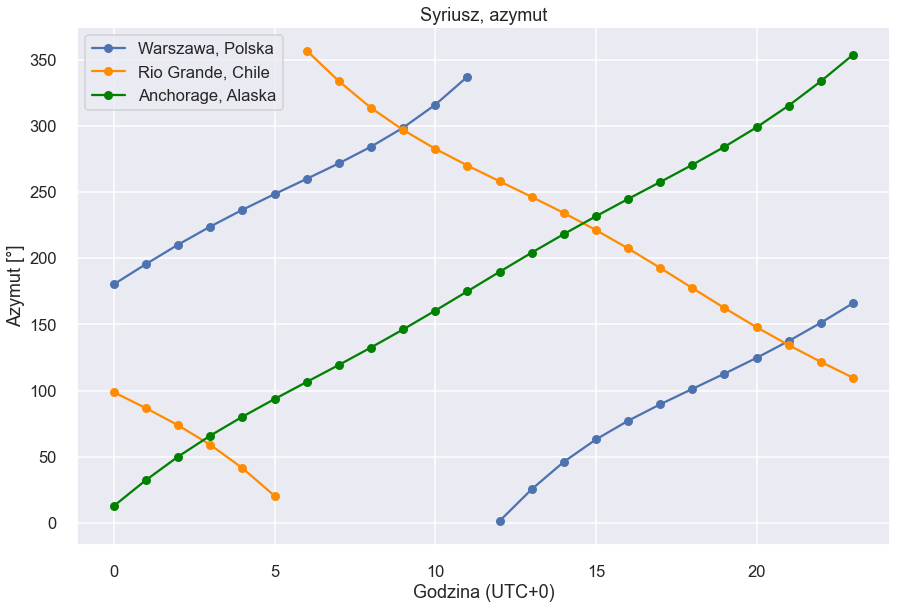

In [26]:
sns.set_theme(context='talk', style='darkgrid')

# plt.plot(orig_df['Godzina'], orig_df['az_WW'], 'o', label="Warszawa, Polska")
# plt.plot(orig_df['Godzina'], orig_df['az_RG'], 'o', label="Rio Grande, Chile")
# plt.plot(orig_df['Godzina'], orig_df['az_AN'], 'o', label="Anchorage, Alaska")
plt.plot(orig_df['Godzina'][:12], orig_df['az_WW'][:12], color='b',marker='o', label="Warszawa, Polska")
plt.plot(orig_df['Godzina'][12:], orig_df['az_WW'][12:], color='b',marker='o')
plt.plot(orig_df['Godzina'][:6], orig_df['az_RG'][:6], color='darkorange', label="Rio Grande, Chile",marker='o')
plt.plot(orig_df['Godzina'][6:], orig_df['az_RG'][6:], color='darkorange',marker='o')
plt.plot(orig_df['Godzina'], orig_df['az_AN'], color='green', label="Anchorage, Alaska",marker='o')

plt.title('Syriusz, azymut')
plt.xlabel('Godzina (UTC+0)')
plt.ylabel('Azymut [°]')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
orig_df['z_WW'] = 90 - orig_df['h_WW']
orig_df['z_AN'] = 90 - orig_df['h_AN']
orig_df['z_RG'] = 90 - orig_df['h_RG']
orig_df['xx_WW'] = 1 * np.sin(np.deg2rad(orig_df['z_WW'])) * np.cos(np.deg2rad(orig_df['az_WW']))
orig_df['xx_AN'] = 1 * np.sin(np.deg2rad(orig_df['z_AN'])) * np.cos(np.deg2rad(orig_df['az_AN']))
orig_df['xx_RG'] = 1 * np.sin(np.deg2rad(orig_df['z_RG'])) * np.cos(np.deg2rad(orig_df['az_RG']))
orig_df['yy_WW'] = 1 * np.sin(np.deg2rad(orig_df['z_WW'])) * np.sin(np.deg2rad(orig_df['az_WW']))
orig_df['yy_AN'] = 1 * np.sin(np.deg2rad(orig_df['z_AN'])) * np.sin(np.deg2rad(orig_df['az_AN']))
orig_df['yy_RG'] = 1 * np.sin(np.deg2rad(orig_df['z_RG'])) * np.sin(np.deg2rad(orig_df['az_RG']))
orig_df['zz_WW'] = 1 * np.cos(np.deg2rad(orig_df['z_WW']))
orig_df['zz_AN'] = 1 * np.cos(np.deg2rad(orig_df['z_AN']))
orig_df['zz_RG'] = 1 * np.cos(np.deg2rad(orig_df['z_RG']))

In [28]:
orig_df['widac_WW'] = orig_df['h_WW'] > 0
orig_df['widac_WW'] = pd.Series(map(lambda x: int(x) ,orig_df['widac_WW']))
orig_df['widac_RG'] = orig_df['h_RG'] > 0
orig_df['widac_RG'] = pd.Series(map(lambda x: int(x) ,orig_df['widac_RG']))
orig_df['widac_AN'] = orig_df['h_AN'] > 0
orig_df['widac_AN'] = pd.Series(map(lambda x: int(x) ,orig_df['widac_AN']))

In [29]:
theta = np.linspace(0,2*np.pi,100)
phi = np.linspace(0,np.pi,100)

lighting_effects = dict(ambient=0.4, diffuse=0.5, roughness=0.9, specular=0.6, fresnel=0.2)
le = dict(ambient=1, diffuse=0.5, roughness=1, specular=0.0, fresnel=1)

x0 = 1 * np.outer(np.cos(theta),np.sin(phi))
y0 = 1 * np.outer(np.sin(theta),np.sin(phi))
z0 = 1 * np.outer(np.ones(100),np.cos(phi))
s = go.Surface(x=x0, y=y0, z=z0, opacity=0.2, colorscale = 'earth',
               name='sfera odniesienia',
               lighting=le, 
               lightposition={'x':0,'y':0,'z':10}) # , colorscale=[[0,clr1], [1,clr2]] , colorscale = 'earth'

g = go.Scatter3d(x=orig_df['yy_WW'], y=orig_df['xx_WW'], z=orig_df['zz_WW'], name='Syriusz', 
                 mode='markers',
                 marker=dict(color=orig_df['widac_WW'], colorscale='blues', reversescale=True, size=15,
                            ),customdata=orig_df['az_WW']
                )

fig = go.Figure()
fig.add_trace(g)
fig.add_trace(s)

axis = dict(
showbackground=True,
backgroundcolor="#D8EDF3",
showgrid=True,
zeroline=True,
showline=False)

fig.update_layout(height=700,
                  title='Warszawa',
                  scene_aspectmode='data',
                  margin={"r":0,"t":40,"l":0,"b":0}, 
                scene = dict(
                                 xaxis = dict(axis, nticks=14, title='y'),
                                 yaxis = dict(axis, nticks=14, title='x'),
                                 zaxis = dict(axis, nticks=14, ),),
                 )
    

fig.update_traces(
    hovertemplate="<br>".join([
        "Azymut: %{customdata}",
    ])
)
fig.show()

In [30]:
g = go.Scatter3d(x=orig_df['yy_RG'], y=orig_df['xx_RG'], z=orig_df['zz_RG'], name='Syriusz', 
                 mode='markers',
                 marker=dict(color=orig_df['widac_RG'], colorscale='blues', reversescale=True, size=15,
                            ),customdata=orig_df['az_RG']
                )

fig = go.Figure()
fig.add_trace(g)
fig.add_trace(s)

axis = dict(
showbackground=True,
backgroundcolor="#F3EDD8",
showgrid=True,
zeroline=True,
showline=False)

fig.update_layout(height=700,
                  title='Rio Grande(Terra le Fuego)',
                  scene_aspectmode='data',
                  margin={"r":0,"t":40,"l":0,"b":0}, 
                scene = dict(
                                 xaxis = dict(axis, nticks=14, title='y'),
                                 yaxis = dict(axis, nticks=14, title='x'),
                                 zaxis = dict(axis, nticks=14, ),),
                 
                 )
    

fig.update_traces(
    hovertemplate="<br>".join([
        "Azymut: %{customdata}",
    ])
)
fig.show()

In [31]:
g = go.Scatter3d(x=orig_df['yy_AN'], y=orig_df['xx_AN'], z=orig_df['zz_AN'], name='Syriusz', 
                 mode='markers',
                 marker=dict(color=orig_df['widac_AN'], colorscale='blues', reversescale=True, size=15,
                            ),customdata=orig_df['az_AN'],
                )

xn = np.outer(np.linspace(-1, 1, 2), np.ones(2))
yn = np.copy(xn).T
zn = np.outer(np.zeros(2), np.ones(2))
p = go.Surface(x=xn, y=yn, z=zn, opacity=0.282, colorscale = 'tempo')

phi = np.linspace(0,2*np.pi, 100)
xc = np.cos(phi)
yc = np.sin(phi)
c = go.Mesh3d(x=xc, y=yc, z=np.zeros(100), opacity=0.82, color = 'darkgreen')

fig = go.Figure()
# fig.add_trace(p)
fig.add_trace(c)
fig.add_trace(g)
fig.add_trace(s)

axis = dict(
showbackground=True,
backgroundcolor="#D8F3D8",
showgrid=True,
zeroline=True,
showline=False)

fig.update_layout(height=700,
                  title='Anchorage(Alaska)',
                  scene_aspectmode='data',
                  margin={"r":0,"t":40,"l":0,"b":0}, 
                scene = dict(
                                 xaxis = dict(axis, nticks=14, title='y'),
                                 yaxis = dict(axis, nticks=14, title='x'),
                                 zaxis = dict(axis, nticks=14, ),),
                 )
    

fig.update_traces(
    hovertemplate="<br>".join([
        "Azymut: %{customdata}",
    ])
)

fig.show()